## 3 visualizations for Malaria data

In [202]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
inc = pd.read_csv('malaria_inc.csv').dropna()
inc.rename(columns={'Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)':'Incidence'}, inplace=True)
inc.head(5)

,Entity,Code,Year,Incidence
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746


In [204]:
inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 507
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Entity     400 non-null    object 
 1   Code       400 non-null    object 
 2   Year       400 non-null    int64  
 3   Incidence  400 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.6+ KB


In [205]:
inc2 = inc.pivot(index='Entity', columns='Year', values='Incidence')
inc2.columns = ['2000', '2005', '2010', '2015']

In [206]:
# inc2['entity'] = inc2.index
inc2['total'] = inc2['2000'] + inc2['2005'] + inc2['2010'] + inc2['2015']
inc2.sort_values('total', inplace = True, ascending = False)
inc2.drop(inc2.index[1], inplace = True)

In [207]:
df1 = inc2.iloc[:10, :4].T
x1 = df1.index
y1 = [df1[col].to_list() for col in list(df1.columns)]

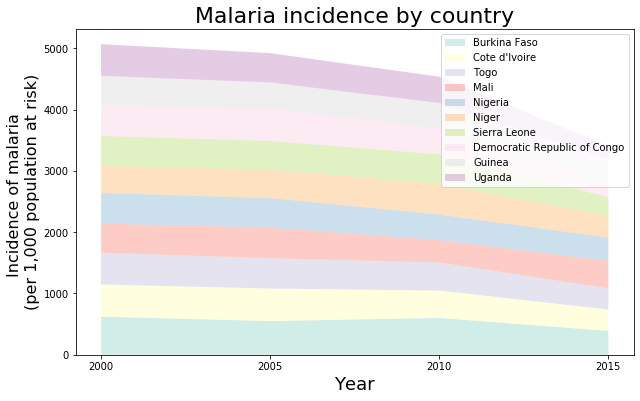

In [261]:
pal = sns.color_palette("Set3")
plt.figure(figsize=(10, 6))
plt.xlabel('Year', fontsize=18)
plt.ylabel("Incidence of malaria \n(per 1,000 population at risk)", fontsize = 16)
plt.stackplot(x1, y1, labels=list(df1.columns), colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
plt.title('Malaria incidence by country', fontsize = 22)
plt.savefig('fig1.png')
# plt.show()

In [209]:
deaths = pd.read_csv('malaria_deaths.csv')
deaths.rename(columns={'Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)':'Deaths_rate'}, inplace=True)
deaths.head(5)

,Entity,Code,Year,Deaths_rate
0,Afghanistan,AFG,1990,6.802930
1,Afghanistan,AFG,1991,6.973494
2,Afghanistan,AFG,1992,6.989882
3,Afghanistan,AFG,1993,7.088983
4,Afghanistan,AFG,1994,7.392472


In [210]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Entity       6156 non-null   object 
 1   Code         5292 non-null   object 
 2   Year         6156 non-null   int64  
 3   Deaths_rate  6156 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 192.5+ KB


In [211]:
import pycountry
import plotly.express as px
from plotly import offline

In [212]:
deaths = deaths.replace({'Entity' : 'Cape Verde'}, 'Cabo Verde')
list_countries = deaths['Entity'].unique().tolist()
# print(list_countries)

In [226]:
country_code = {}  # To hold the country names and their ISO
for country in list_countries:
    try:
        data = pycountry.countries.search_fuzzy(country)
        code = data[0].alpha_3
        country_code.update({country: code})
    except:
        print('could not add ISO 3 code for ->', country)
        # If could not find country, make ISO code ' '
        country_code.update({country: ' '})

could not add ISO 3 code for -> Andean Latin America
could not add ISO 3 code for -> Australasia
could not add ISO 3 code for -> Caribbean
could not add ISO 3 code for -> Central Asia
could not add ISO 3 code for -> Central Europe
could not add ISO 3 code for -> Central Latin America
could not add ISO 3 code for -> Central Sub-Saharan Africa
could not add ISO 3 code for -> Democratic Republic of Congo
could not add ISO 3 code for -> East Asia
could not add ISO 3 code for -> Eastern Europe
could not add ISO 3 code for -> Eastern Sub-Saharan Africa
could not add ISO 3 code for -> High SDI
could not add ISO 3 code for -> High-income Asia Pacific
could not add ISO 3 code for -> High-middle SDI
could not add ISO 3 code for -> Laos
could not add ISO 3 code for -> Latin America and Caribbean
could not add ISO 3 code for -> Low SDI
could not add ISO 3 code for -> Low-middle SDI
could not add ISO 3 code for -> Micronesia (country)
could not add ISO 3 code for -> Middle SDI
could not add ISO 3 c

In [227]:
# manually fill some iso 3 code
country_code['South Korea'] = 'KOR'
country_code['North Korea'] = 'PRK'
country_code['Swaziland'] = 'SWZ'
country_code['Democratic Republic of Congo'] = 'COD'
country_code['Niger'] = 'NER'

In [228]:
# create a new column iso_alpha in the df and fill it with appropriate iso 3 code
for k, v in country_code.items():
    deaths.loc[(deaths.Entity == k), 'iso_alpha'] = v

In [229]:
fig = px.choropleth(data_frame = deaths,
                    locations= "iso_alpha",
                    color= "Deaths_rate",  # value in column 'Deaths_rate' determines color
                    hover_name= "Entity",
                    color_continuous_scale= 'Viridis', 
                    animation_frame= "Year", 
                    title="Malaria death rate (per 100,000 people) by country")
offline.plot(fig, filename='fig2.html')
fig.show()

In [239]:
deaths_age = pd.read_csv('malaria_deaths_age.csv', index_col = 0)
deaths_age.head(5)

,entity,code,year,age_group,deaths
1,Afghanistan,AFG,1990,Under 5,184.606435
2,Afghanistan,AFG,1991,Under 5,191.658193
3,Afghanistan,AFG,1992,Under 5,197.140197
4,Afghanistan,AFG,1993,Under 5,207.357753
5,Afghanistan,AFG,1994,Under 5,226.209363


In [248]:
grouped = deaths_age.groupby(['age_group', 'year']).sum()
grouped['index'] = grouped.index
grouped[['age_group','year']] = pd.DataFrame(grouped['index'].to_list(), index= grouped.index)
grouped.drop('index', axis = 1, inplace = True)
grouped

deaths            index
age_group year                               
15-49     1990  2.217274e+05    (15-49, 1990)
          1991  2.342597e+05    (15-49, 1991)
          1992  2.403524e+05    (15-49, 1992)
          1993  2.492130e+05    (15-49, 1993)
          1994  2.578255e+05    (15-49, 1994)
...                      ...              ...
Under 5   2012  2.864898e+06  (Under 5, 2012)
          2013  2.774526e+06  (Under 5, 2013)
          2014  2.680571e+06  (Under 5, 2014)
          2015  2.573806e+06  (Under 5, 2015)
          2016  2.559410e+06  (Under 5, 2016)

[135 rows x 2 columns]

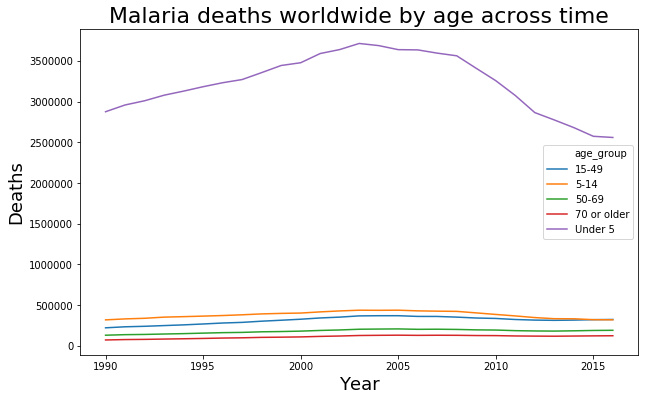

In [262]:
plt.figure(figsize=(10,6))
sns.lineplot(data=grouped, x="year", y="deaths", hue="age_group")
plt.xlabel('Year', fontsize=18)
plt.ylabel("Deaths", fontsize = 18)
plt.title('Malaria deaths worldwide by age across time', fontsize = 22)
plt.savefig('fig3.png')